In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [290]:
frozen_lake_VI_csv_list = ['out/value-iteration-(30, 30)-epsilon-0.001-gamma-0.8.csv',
            'out/value-iteration-(30, 30)-epsilon-0.001-gamma-0.9.csv',
            'out/value-iteration-(30, 30)-epsilon-0.001-gamma-0.95.csv',
            'out/value-iteration-(30, 30)-epsilon-0.001-gamma-0.99.csv']
frozen_lake_PI_csv_list = ['out/policy-iteration-(30, 30)-epsilon-0.001-gamma-0.8.csv',
            'out/policy-iteration-(30, 30)-epsilon-0.001-gamma-0.9.csv',
            'out/policy-iteration-(30, 30)-epsilon-0.001-gamma-0.95.csv',
            'out/policy-iteration-(30, 30)-epsilon-0.001-gamma-0.99.csv']
frozen_lake_QL_csv_list = ['out/ql-FrozenLakeModified30x30-epsilon-0.85-decaytype-1-runs-20000.csv',
                           'out/ql-FrozenLakeModified30x30-epsilon-0.5-decaytype-1-runs-20000.csv',
                           'out/ql-FrozenLakeModified30x30-epsilon-0.5-decaytype-3-runs-20000.csv',
                           'out/ql-FrozenLakeModified30x30-epsilon-0.85-decaytype-4-runs-20000.csv']
forest_VI_csv_list = ['out/value-iteration-forest-numStates-10-gamma-0.8.csv',
                           'out/value-iteration-forest-numStates-10-gamma-0.9.csv',
                           'out/value-iteration-forest-numStates-10-gamma-0.95.csv',
                           'out/value-iteration-forest-numStates-10-gamma-0.99.csv']
forest_PI_csv_list = ['out/policy-iteration-forest-numStates-10-gamma-0.8.csv',
                           'out/policy-iteration-forest-numStates-10-gamma-0.9.csv',
                           'out/policy-iteration-forest-numStates-10-gamma-0.95.csv',
                           'out/policy-iteration-forest-numStates-10-gamma-0.99.csv']
forest_QL_csv_list = ['out/ql-forest-decaytype-1.csv', 
                      'out/ql-forest-decaytype-2.csv',
                      'out/ql-forest-decaytype-3.csv',
                      'out/ql-forest-decaytype-4.csv']


In [61]:
df = pd.read_csv(csv_list[0])

In [69]:
df

,env_name,algname,gamma,epsilon,threshold,Iteration,V_variation,V_delta,V_max_diff,V_average,V_sum,clock_time,# chg action at iter,# chg actions
0,"frozen-lake-(30, 30)",VI,0.99,0.001,0.00001,1,0.890000,1.780000,0.890000,0.004200,3.780000,0.010595,2,2
1,"frozen-lake-(30, 30)",VI,0.99,0.001,0.00001,2,0.781100,3.124400,0.781100,0.007672,6.904400,0.014947,4,6
2,"frozen-lake-(30, 30)",VI,0.99,0.001,0.00001,3,0.673289,2.693156,0.673289,0.010664,9.597556,0.019056,4,10
3,"frozen-lake-(30, 30)",VI,0.99,0.001,0.00001,4,0.566556,2.266224,0.566556,0.013182,11.863780,0.023403,4,14
4,"frozen-lake-(30, 30)",VI,0.99,0.001,0.00001,5,0.460891,2.304453,0.460891,0.015742,14.168233,0.027516,5,19
5,"frozen-lake-(30, 30)",VI,0.99,0.001,0.00001,6,0.356282,2.493972,0.356282,0.018514,16.662205,0.031721,6,25
6,"frozen-lake-(30, 30)",VI,0.99,0.001,0.00001,7,0.252719,2.021751,0.252719,0.020760,18.683955,0.036303,7,32
7,"frozen-lake-(30, 30)",VI,0.99,0.001,0.00001,8,0.150192,0.901150,0.150192,0.021761,19.585105,0.041610,6,38
8,"frozen-lake-(30, 30)",VI,0.99,0.001,0.00001,9,0.048690,0.438208,0.048690,0.022248,20.023313,0.046845,8,46
9,"frozen-lake-(30, 30)",VI,0.99,0.001,0.00001,10,0.000000,0.000000,0.000000,0.022248,20.023313,0.051174,0,46


In [261]:
def plot_results(problem_name, alg_name, csv_list, x_col_name, y_col_name, x_label, y_label, label_col = None, 
                 show_convergence=True, logx=False, logy=False, vertical_x=False, vertical_y=False):
    plt.style.use('seaborn')
    fig = plt.figure()
    ax = fig.add_subplot(111)
    num_x_ticks = 0
    for csv in csv_list:
        df = pd.read_csv(csv)
        if label_col:
            label = label_col+ ": " + str(df[label_col][0])
        plt.plot(df[x_col_name], df[y_col_name], label=label)
        if logx:
            plt.xscale('log')
        if logy:
            plt.yscale('log')
        if show_convergence:
            plt.plot(df[x_col_name].iat[-1], df[y_col_name].iat[-1], 'g*')
        if df.shape[0]> num_x_ticks:
            num_x_ticks=df.shape[0]
            if num_x_ticks >22:
                ax.set_xticks(df[x_col_name][::int(num_x_ticks/20)])
            else:
                ax.set_xticks(df[x_col_name])
        if vertical_x:
            plt.xticks(rotation='vertical')
        
        plt.legend()
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.title(problem_name + ": "+alg_name + '-' +y_label + ' vs ' + x_label)

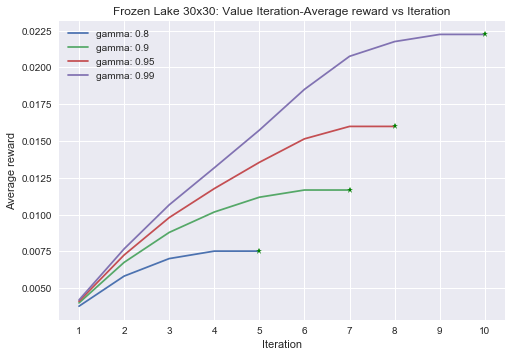

In [259]:
plot_results('Frozen Lake 30x30', 'Value Iteration', frozen_lake_VI_csv_list, 'Iteration', 
             'V_average', 'Iteration', 'Average reward', label_col = 'gamma', show_convergence=True)

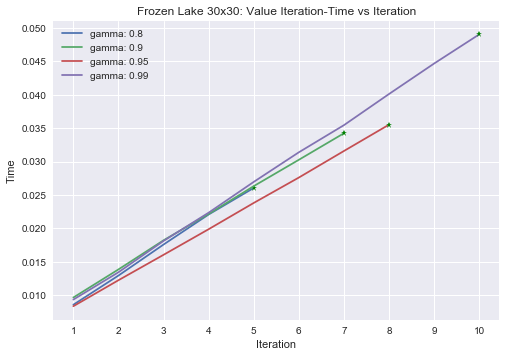

In [228]:
plot_results('Frozen Lake 30x30', 'Value Iteration', frozen_lake_VI_csv_list, 'Iteration', 
             'clock_time', 'Iteration', 'Time', label_col = 'gamma', show_convergence=True)

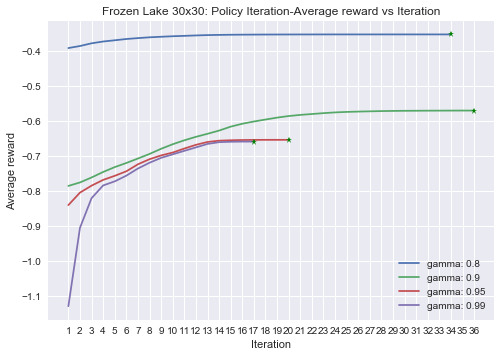

In [229]:
plot_results('Frozen Lake 30x30', 'Policy Iteration', frozen_lake_PI_csv_list, 'Iteration', 
             'V_average', 'Iteration', 'Average reward', label_col = 'gamma', show_convergence=True)

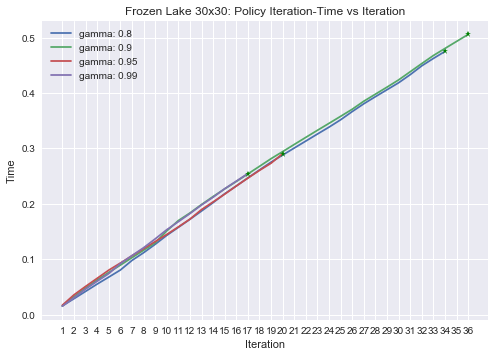

In [230]:
plot_results('Frozen Lake 30x30', 'Policy Iteration', frozen_lake_PI_csv_list, 'Iteration', 
             'clock_time', 'Iteration', 'Time', label_col = 'gamma', show_convergence=True)

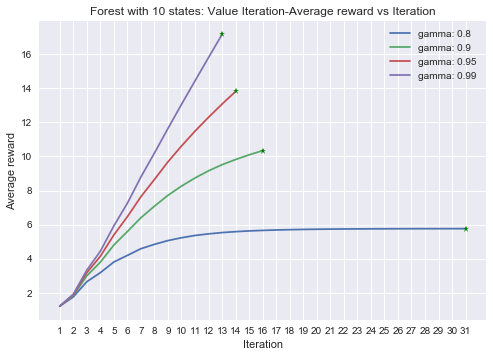

In [231]:
plot_results('Forest with 10 states', 'Value Iteration', forest_VI_csv_list, 'Iteration', 
             'V_average', 'Iteration', 'Average reward', label_col = 'gamma', show_convergence=True)

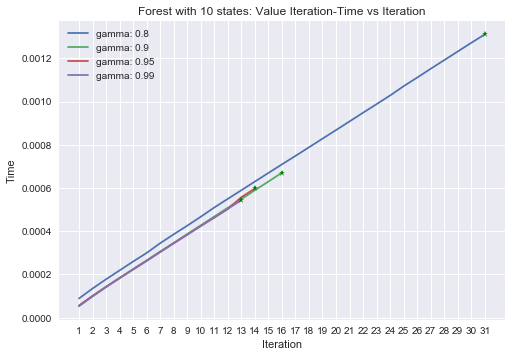

In [232]:
plot_results('Forest with 10 states', 'Value Iteration', forest_VI_csv_list, 'Iteration', 
             'clock_time', 'Iteration', 'Time', label_col = 'gamma', show_convergence=True)

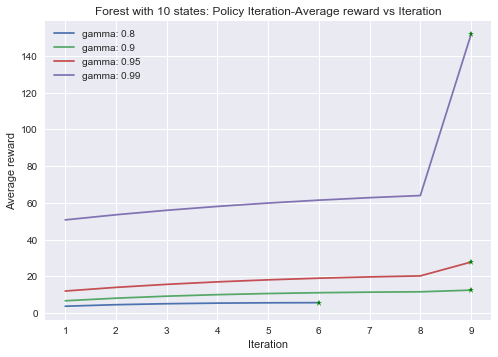

In [233]:
plot_results('Forest with 10 states', 'Policy Iteration', forest_PI_csv_list, 'Iteration', 
             'V_average', 'Iteration', 'Average reward', label_col = 'gamma', show_convergence=True)

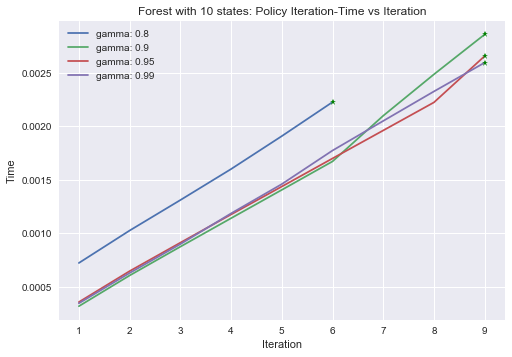

In [234]:
plot_results('Forest with 10 states', 'Policy Iteration', forest_PI_csv_list, 'Iteration', 
             'clock_time', 'Iteration', 'Time', label_col = 'gamma', show_convergence=True)

In [235]:
df=pd.read_csv('out/ql-forest-decaytype-1.csv')
df

,episode,V_average,V_sum,time,epsilon
0,1,2.771360,8.314080,0.003131,0.216679
1,2,3.748980,11.246939,0.006454,0.188562
2,3,4.608954,13.826863,0.009903,0.175220
3,4,5.244237,15.732710,0.013223,0.166835
4,5,5.803518,17.410554,0.016385,0.160859
...,...,...,...,...,...
95,96,11.690323,35.070969,0.323230,0.109056
96,97,11.700755,35.102265,0.326479,0.108933
97,98,11.710080,35.130241,0.329583,0.108811
98,99,11.723748,35.171245,0.332900,0.108691


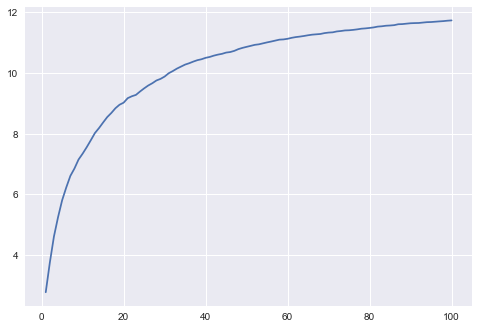

In [236]:
plt.plot(df['episode'], df['V_average'])

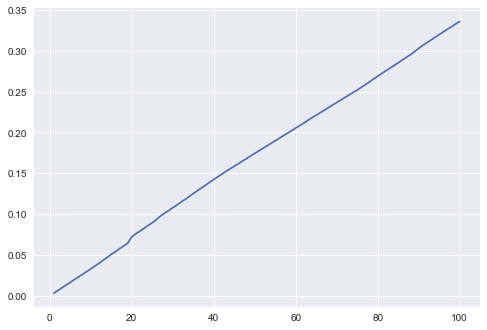

In [237]:
plt.plot(df['episode'], df['time'])

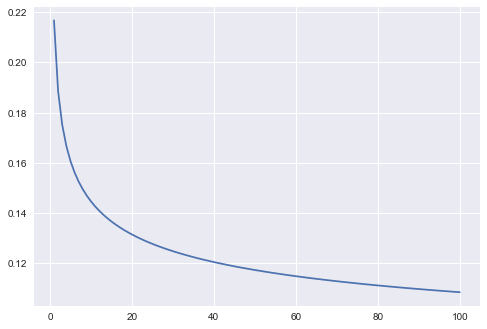

In [238]:
plt.plot(df['episode'], df['epsilon'])

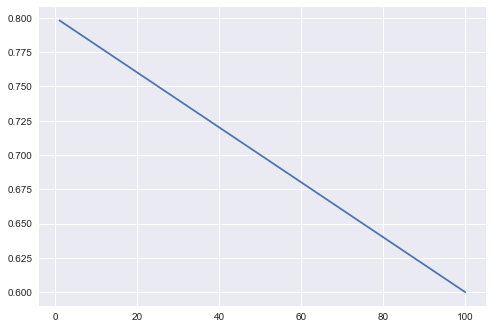

In [239]:
df2=pd.read_csv('out/ql-forest-decaytype-2.csv')
plt.plot(df2['episode'], df2['epsilon'])

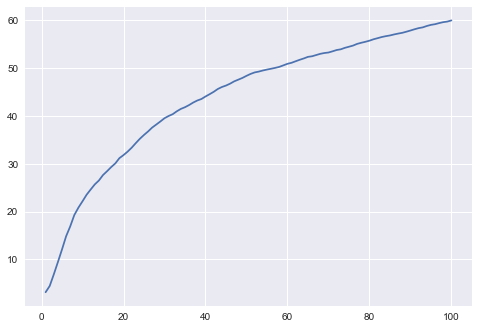

In [240]:
plt.plot(df2['episode'], df2['V_average'])

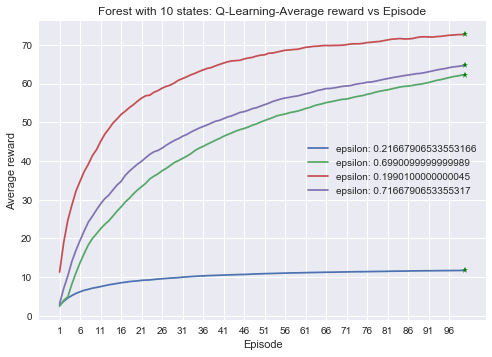

In [292]:
plot_results('Forest with 10 states', 'Q-Learning', forest_QL_csv_list, 'episode', 
             'V_average', 'Episode', 'Average reward', label_col = 'epsilon', show_convergence=True)

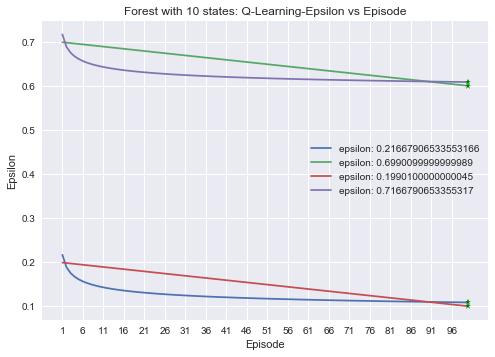

In [291]:
plot_results('Forest with 10 states', 'Q-Learning', forest_QL_csv_list, 'episode', 
             'epsilon', 'Episode', 'Epsilon', label_col = 'epsilon', show_convergence=True)

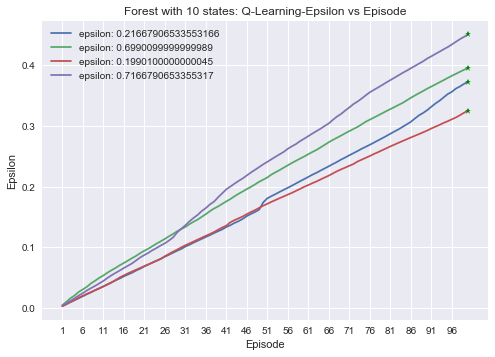

In [295]:
plot_results('Forest with 10 states', 'Q-Learning', forest_QL_csv_list, 'episode', 
             'time', 'Episode', 'Epsilon', label_col = 'epsilon', show_convergence=True)

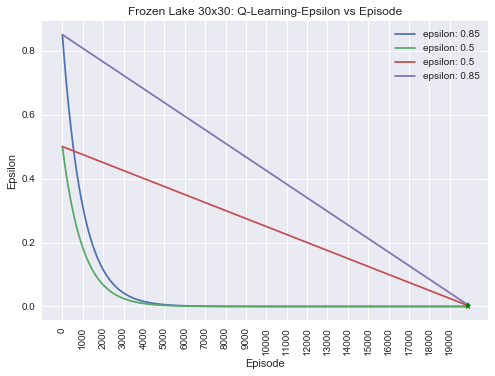

In [271]:
plot_results('Frozen Lake 30x30', 'Q-Learning', frozen_lake_QL_csv_list, 'episode', 
             'epsilon', 'Episode', 'Epsilon', label_col = 'epsilon', show_convergence=True, vertical_x=True)

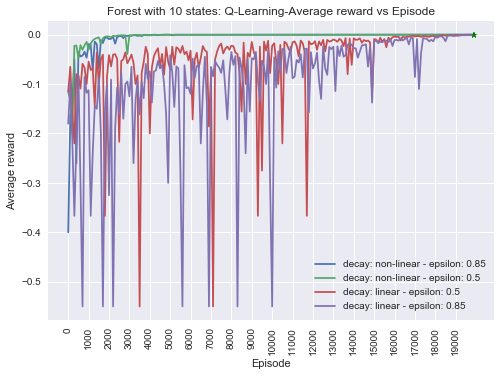

In [273]:
plot_results('Forest with 10 states', 'Q-Learning', frozen_lake_QL_csv_list, 'episode', 
             'avg_reward', 'Episode', 'Average reward', label_col = 'decay', show_convergence=True, vertical_x=True)

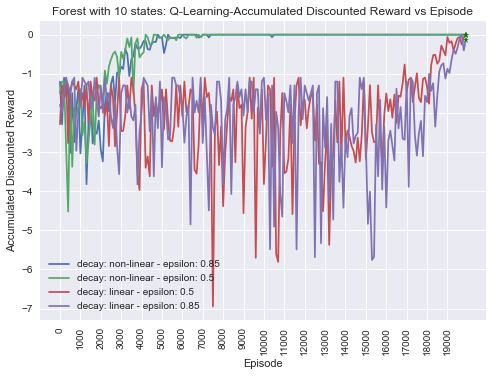

In [272]:
plot_results('Forest with 10 states', 'Q-Learning', frozen_lake_QL_csv_list, 'episode', 
             'cum_discounted_rewards', 'Episode', 'Accumulated Discounted Reward', label_col = 'decay', show_convergence=True, vertical_x=True)

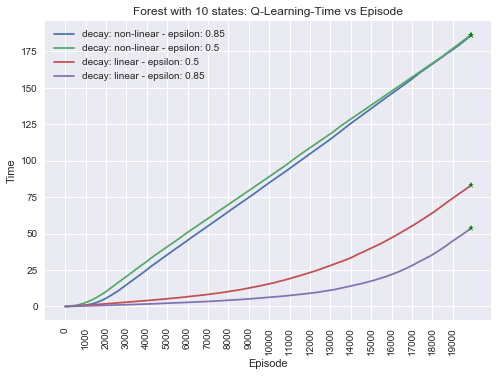

In [274]:
plot_results('Forest with 10 states', 'Q-Learning', frozen_lake_QL_csv_list, 'episode', 
             'accumulated_time', 'Episode', 'Time', label_col = 'decay', show_convergence=True, vertical_x=True)

In [287]:
df

,episode,epsilon,terminal_reward,cum_discounted_rewards,episode_tot_rewards,avg_reward,avg_delta_reward,gamma,alpha,episode_time,accumulated_time,num_exploitation,num_exploration,done?,steps_before_done,state_size,decay_rate,decay_type,decay
0,0,0.85000,-1.0,-1.796408,-1.8,-0.180000,-0.180000,0.999,0.8,0.000367,0.000367,0,10,True,9,900,0.999,4,linear - epsilon: 0.85
1,100,0.84575,-1.0,-1.993821,-2.0,-0.095238,-0.000236,0.999,0.8,0.000658,0.032254,1,20,True,20,900,0.999,4,linear - epsilon: 0.85
2,200,0.84150,-1.0,-1.498502,-1.5,-0.214286,-0.005715,0.999,0.8,0.000218,0.066036,0,7,True,6,900,0.999,4,linear - epsilon: 0.85
3,300,0.83725,-1.0,-1.099900,-1.1,-0.366667,0.000000,0.999,0.8,0.000100,0.105186,0,3,True,2,900,0.999,4,linear - epsilon: 0.85
4,400,0.83300,-1.0,-1.299002,-1.3,-0.216667,0.000000,0.999,0.8,0.000188,0.137848,0,6,True,5,900,0.999,4,linear - epsilon: 0.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,19500,0.02125,0.0,-0.322230,-0.4,-0.000800,0.000000,0.999,0.8,0.009837,49.630890,488,12,False,499,900,0.999,4,linear - epsilon: 0.85
196,19600,0.01700,0.0,-0.093236,-0.1,-0.000200,0.000000,0.999,0.8,0.009775,50.654049,493,7,False,499,900,0.999,4,linear - epsilon: 0.85
197,19700,0.01275,0.0,0.000000,0.0,0.000000,0.000000,0.999,0.8,0.009873,51.696915,496,4,False,499,900,0.999,4,linear - epsilon: 0.85
198,19800,0.00850,0.0,-0.403636,-0.5,-0.001000,0.000000,0.999,0.8,0.009355,52.657122,491,9,False,499,900,0.999,4,linear - epsilon: 0.85


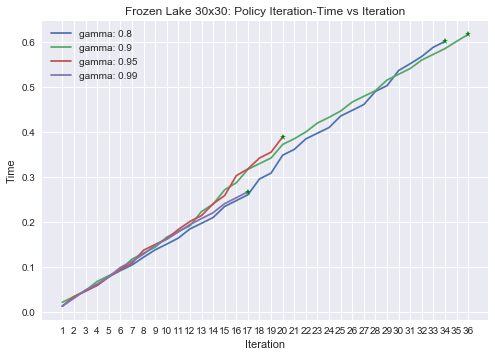

In [296]:
plot_results('Frozen Lake 30x30', 'Policy Iteration', frozen_lake_PI_csv_list, 'Iteration',
             'clock_time', 'Iteration', 'Time', label_col = 'gamma', show_convergence=True)